In [ ]:
# This project is about investigate a Baseball dataset and find if some variables are related
# The dataset is available on http://www.seanlahman.com/baseball-archive/statistics/

In [2]:
# Importing libs
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
"""Quality of Analysis"""
# Questions about data
# I would like to know if Salaries are related to Fame, I will analysis two files Salaries.csv and HallOfFame.csv

# Are just the players with big salaries in the Hall of Fame
# Do the salaries in the last 10 years increase more than total period

In [3]:
"""Data Wrangling Phase"""
# Changes that were made to clean the data, such as merging files, handling missing values

# read data into Pandas DataFrames
#salaries = pd.read_csv('Salaries.csv', index_col='playerID')
salaries = pd.read_csv('Salaries.csv')
hallOfFame = pd.read_csv('HallOfFame.csv')

#change yearid in HallOfFame.csv to yearID
hallOfFame.columns = ['playerID','yearID','votedBy','ballots','needed','votes','inducted','category','needed_note']

# Analysis in the last 10 years
salariesLast10years = salaries[salaries.yearID > 2006]
hallOfFameLast10years = hallOfFame[hallOfFame.yearID > 2006]

# Merge the two tables
salaryJoinHallOfFame = salariesLast10years.merge(hallOfFameLast10years, on=['playerID'], how='inner')

Populating the interactive namespace from numpy and matplotlib


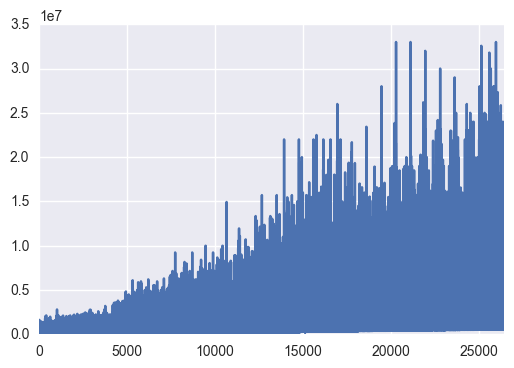

In [4]:
"""Exploration Phase"""
# Investigate the stated question(s) from multiple angles.

# Plotting the dataset, the salaries increases over the years
%pylab inline
salaries['salary'].plot()

In [5]:
# Total stats from Salaries.csv
print ("Total stats")
print(salaries.groupby('yearID').sum()['salary'].describe())

print ("Last 10 years stats")
print(salariesLast10years.groupby('yearID').sum()['salary'].describe())

Total stats
count    3.200000e+01
mean     1.722473e+09
std      1.064078e+09
min      2.619647e+08
25%      8.776909e+08
50%      1.813399e+09
75%      2.669760e+09
max      3.750137e+09
Name: salary, dtype: float64
Last 10 years stats
count    1.000000e+01
mean     2.975600e+09
std      4.046194e+08
min      2.476689e+09
25%      2.693984e+09
50%      2.858623e+09
75%      3.152870e+09
max      3.750137e+09
Name: salary, dtype: float64


In [6]:
#Using stats library to compare total salaries and salaries last 10 years
slope10, intercept10, r_value10, p_value10, std_err10 = stats.linregress(salariesLast10years.yearID,salariesLast10years.salary)

last10yearsIndexDf = ['slope','intercept','r_value','p_value','std_err']

last10yearsStats = pd.DataFrame([slope10, intercept10, r_value10, p_value10, std_err10], index=last10yearsIndexDf, columns=['Stats last 10 years'])

print last10yearsStats

           Stats last 10 years
slope             1.589106e+05
intercept        -3.160676e+08
r_value           9.505133e-02
p_value           3.761616e-18
std_err           1.825345e+04


In [7]:
#Using stats library to compare total salaries and salaries last 10 years
slope, intercept, r_value, p_value, std_err = stats.linregress(salaries.yearID,salaries.salary)

totalIndexDf = ['slope','intercept','r_value','p_value','std_err']

totalStats = pd.DataFrame([slope, intercept, r_value, p_value, std_err], index=totalIndexDf, columns=['Stats total'])

print totalStats

            Stats total
slope      1.364173e+05
intercept -2.708687e+08
r_value    3.517400e-01
p_value    0.000000e+00
std_err    2.233331e+03


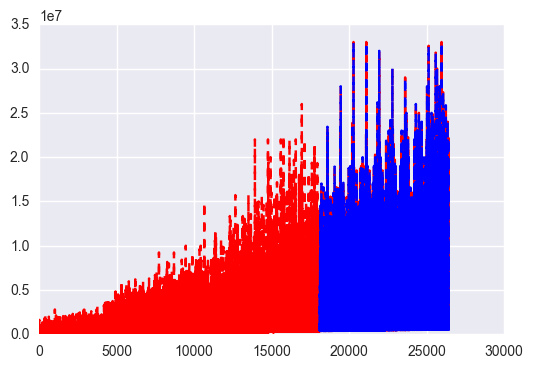

In [8]:
# Plot
# Using matplotlib and compare total slope and last 10 years slope
plt.plot(salaries['salary'],'r--',salariesLast10years['salary'],'b--')


In [9]:
maxPlayerId = salaryJoinHallOfFame['salary'].argmax()
minPlayerId = salaryJoinHallOfFame['salary'].argmin()

print salaryJoinHallOfFame.iloc[[maxPlayerId]]
print " "
print salaryJoinHallOfFame.iloc[[minPlayerId]]

    yearID_x teamID lgID   playerID    salary  yearID_y votedBy  ballots  \
28      2009    LAN   NL  ramirma02  23854494      2017   BBWAA    442.0   

    needed  votes inducted category needed_note  
28   332.0  105.0        N   Player         NaN  
 
     yearID_x teamID lgID   playerID  salary  yearID_y votedBy  ballots  \
301      2010    CIN   NL  francju02  400000      2013   BBWAA    569.0   

     needed  votes inducted category needed_note  
301   427.0    6.0        N   Player         NaN  


In [10]:
# finding if the minimum salary is in the hall of fame dataset
print 'yearID_x','teamID','lgID','playerID','salary','yearID_y','ballots','needed','votes'
for index, row in salaryJoinHallOfFame.iterrows():
    if row['playerID'] == 'ramirma02':
        print  row['yearID_x'],row['teamID'],row['lgID'],row['playerID'],row['salary'],row['yearID_y'],row['ballots'],row['needed'], row['votes']
    elif row['playerID'] == 'francju02':
        print  row['yearID_x'],row['teamID'],row['lgID'],row['playerID'],row['salary'],row['yearID_y'],row['ballots'],row['needed'], row['votes']
        

yearID_x teamID lgID playerID salary yearID_y ballots needed votes
2007 BOS AL ramirma02 17016381 2017 442.0 332.0 105.0
2008 BOS AL ramirma02 18929923 2017 442.0 332.0 105.0
2009 LAN NL ramirma02 23854494 2017 442.0 332.0 105.0
2010 LAN NL ramirma02 18695006 2017 442.0 332.0 105.0
2011 TBA AL ramirma02 2020000 2017 442.0 332.0 105.0
2010 CIN NL francju02 400000 2013 569.0 427.0 6.0
2011 CIN NL francju02 414000 2013 569.0 427.0 6.0
2012 ATL NL francju02 480000 2013 569.0 427.0 6.0
2013 ATL NL francju02 496250 2013 569.0 427.0 6.0


In [ ]:
"""Conclusions Phase"""

""""
Comparing the values in the statistics, in the last 10 years the slope is grater than the total years, meaning that the salaries
increase more.

playerID francju02 with the min salary is in the hall of fame table as ramirma02 with the max salary, this data is interresting
because not only players with big salary  are in the hall of fame but also small salary.

""""

In [ ]:
"""Communication"""
"""The flow of the analysis"""
# Choose the dataset: Baseball Data (http://www.seanlahman.com/baseball-archive/statistics/)
# State one or more questions about the data
# Clean the data, merging, changing column name and other changes
# Explore the data using statistics, plot
# Conclusion about questions stated

In [ ]:
# References

# https://docs.scipy.org/doc/scipy-0.18.1/reference/stats.html
# https://classroom.udacity.com/nanodegrees/nd002